## Diagnosis of Alzheimer’s Disease using Hybrid Machine Learning Model


**This project's steps were as follows:**


1.   Introduction.
2.   Getting the data ready - Exploratory data analysis (EDA).
3.   Choosing the right estimator/algorithm/model for the problem and fitting the model to make predictions.
4.   Evaluating a machine learning model.
5.   Improving predictions through experimentation - hyperparamer tunning.

## Getting the data ready - EDA(Exploratory data analysis)

In [1]:
import pandas as pd
df = pd.read_csv('data/oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [2]:
df["Group"].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

In [3]:
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns

In [4]:
df
# 0 - female
# 1 - male

# 0 - Demented
# 1= Non-demented

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,0,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,1,0,1,71,16,NaN,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0182,1,0,1,73,12,NaN,23.0,0.5,1661,0.698,1.056
146,OAS2_0183,0,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174
147,OAS2_0184,1,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
148,OAS2_0185,1,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [5]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [6]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [7]:
# profile.to_file("disease.html")

### Checking for missing values.

In [8]:
pd.isnull(df).sum() 

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

### Data distribution of outcome variable

In [9]:
# Dropped the 8 rows with missing values in the column, SES
df = df.dropna(axis=0, how='any')
pd.isnull(df).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [10]:
df['Group'].value_counts()

0    72
1    70
Name: Group, dtype: int64

In [11]:
df.dtypes

Subject ID     object
Group           int64
MR Delay        int64
M/F             int64
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [12]:
# Are there any missing values?
df.isna().sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [13]:
df

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0004,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,0,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
5,OAS2_0008,0,0,0,93,14,2.0,30.0,0.0,1272,0.698,1.380
6,OAS2_0009,1,0,1,68,12,2.0,27.0,0.5,1457,0.806,1.205
...,...,...,...,...,...,...,...,...,...,...,...,...
143,OAS2_0179,1,0,1,79,20,1.0,26.0,0.5,1548,0.711,1.134
146,OAS2_0183,0,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174
147,OAS2_0184,1,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
148,OAS2_0185,1,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [14]:
df = df.drop("Subject ID", axis=1)

In [15]:
df

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,0,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
5,0,0,0,93,14,2.0,30.0,0.0,1272,0.698,1.380
6,1,0,1,68,12,2.0,27.0,0.5,1457,0.806,1.205
...,...,...,...,...,...,...,...,...,...,...,...
143,1,0,1,79,20,1.0,26.0,0.5,1548,0.711,1.134
146,0,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174
147,1,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
148,1,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [ ]:
### Data Visualization

## Modelling

In [16]:
# Split data into X and y

X = df.drop("Group", axis=1)
y = df["Group"]

In [17]:
X

,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
5,0,0,93,14,2.0,30.0,0.0,1272,0.698,1.380
6,0,1,68,12,2.0,27.0,0.5,1457,0.806,1.205
...,...,...,...,...,...,...,...,...,...,...
143,0,1,79,20,1.0,26.0,0.5,1548,0.711,1.134
146,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174
147,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
148,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [18]:
y

0      0
2      0
3      0
5      0
6      1
      ..
143    1
146    0
147    1
148    1
149    0
Name: Group, Length: 142, dtype: int64

In [19]:
# Split data into train and test sets
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((113, 10), (29, 10), (113,), (29,))

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

## Choosing a estimator/algorithm for a classification problem.


**RandomForest Model**

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test) # Evaluation

0.896551724137931

### Make predictions using a machine learning model.

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [21]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [22]:
clf.predict_proba(X_test)[:5]

array([[0.15, 0.85],
       [0.79, 0.21],
       [0.85, 0.15],
       [0.64, 0.36],
       [0.02, 0.98]])

### Evaluating a machine learning model.
Three ways to evaluate Scikit-Learn models/estimators.
1. Estimator's built-in `score()` method.
2. The `scoring` parameter.
3. Problem-specific metric function.

#### Classification model evaluation metrics

1. Accuracy.
2. Area under ROC curve.
3. Confusion matrix.
4. Classification report

**Accuracy**

**Estimator's built-in score() method**

In [23]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and y
X = df.drop("Group", axis=1)
y = df["Group"]

# Create train/test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance.
clf = RandomForestClassifier()

# Fit classifier to training data
clf.fit(X_train, y_train)

RandomForestClassifier()

The default score() evaluation metric for a classification problem is `mean accuracy`

In [24]:
print(f"Accuracy using buit-in score() is : {clf.score(X_test,y_test)*100:.2f}%")

Accuracy using buit-in score() is : 89.66%


**The scoring parameter - Cross-Validation Method**

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(clf, X, y, cv = 5, scoring = None)
print(f"Accuracy using cross-validation is : {np.mean(cross_val_score)* 100:.2f}%")

Accuracy using cross-validation is : 90.15%


Always recommended to consider the cross-validation score.

**ROC/AUC curve - Area under the reciever operating characteristic curve**
* Area under the curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false possitive rate (fpr).
* True possitve  = model predicts 1 when truth is 1.
* False possitive = model predicts 1 when truth is 0.
* True negative = model predicts 0 when truth is 0.
* False negative = model predicts 0 when truth is 1. 

In [26]:
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.15, 0.85],
       [0.79, 0.21],
       [0.85, 0.15],
       [0.64, 0.36],
       [0.02, 0.98],
       [0.76, 0.24],
       [0.81, 0.19],
       [0.66, 0.34],
       [0.78, 0.22],
       [0.06, 0.94]])

In [27]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.85, 0.21, 0.15, 0.36, 0.98, 0.24, 0.19, 0.34, 0.22, 0.94])

In [28]:
# Clacuate fpr, tpr, threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [29]:
# Createa function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    '''
    
    # plot roc curve
    plt.plot(fpr, tpr, color ="orange", label="ROC")
    #plot line with no preedictive power.
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positve rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()


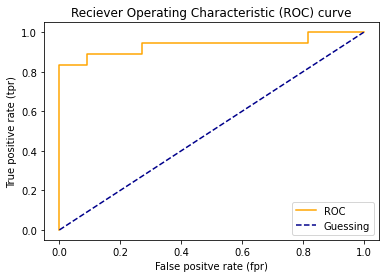

In [30]:
plot_roc_curve(fpr, tpr)  

In [31]:
from sklearn.metrics import roc_auc_score
area_under_curve_score = roc_auc_score(y_test, y_probs_positive)
print(f"Area under the curve score is : {area_under_curve_score * 100:.2f}%")

Area under the curve score is : 93.43%


**Confusion Matrix**

- A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was suupposed to predict.
- In essence, giving you an idea of where the model is getting confused.

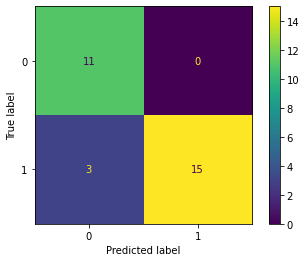

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_preds = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                       y_pred = y_preds)

**Classification Report**

In [33]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test, y_preds,  output_dict = True))

,0,1,accuracy,macro avg,weighted avg
precision,0.785714,1.000000,0.896552,0.892857,0.918719
recall,1.000000,0.833333,0.896552,0.916667,0.896552
f1-score,0.880000,0.909091,0.896552,0.894545,0.898056
support,11.000000,18.000000,0.896552,29.000000,29.000000


###  Using scoring parameter (Cross-Validation) - Accuracy, precision, recall

In [34]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.93103448, 0.86206897, 0.92857143, 0.85714286, 0.89285714])

In [35]:
print(f"The Cross-Validates Accuracy: {np.mean(cv_acc)*100:.2f}%")

The Cross-Validates Accuracy: 89.43%


In [36]:
# Precision
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = "precision")
cv_precision

array([1.        , 0.85714286, 1.        , 1.        , 0.92307692])

In [37]:
print(f"The Cross-Validated precision: {np.mean(cv_precision)}")

The Cross-Validated precision: 0.956043956043956


In [38]:
# Recall

np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
cv_recall

array([0.85714286, 0.85714286, 0.85714286, 0.71428571, 0.85714286])

In [39]:
print(f"The Cross-Validated recall: {np.mean(cv_recall)}")

The Cross-Validated recall: 0.8285714285714285


In [155]:
# F!-score

np.random.seed(42)

cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = "f1")
cv_f1

array([0.88      , 0.82758621, 0.92307692, 0.83333333, 0.92307692])

In [156]:
print(f"The Cross-Validated F1-score: {np.mean(cv_f1)}")

The Cross-Validated F1-score: 0.8774146772767463


In [40]:
# USing train_test_split.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Classifier metrics on the test set ")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1-score: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set 
Accuracy: 89.66%
Precision: 1.0
Recall: 0.8333333333333334
F1-score: 0.9090909090909091


In [41]:
print("Classifier metrics on the test set ")
print(f"The Cross-Validates Accuracy: {np.mean(cv_acc)*100:.2f}%")
print(f"The Cross-Validated precision: {np.mean(cv_precision)}")
print(f"The Cross-Validated recall: {np.mean(cv_recall)}")

Classifier metrics on the test set 
The Cross-Validates Accuracy: 89.43%
The Cross-Validated precision: 0.956043956043956
The Cross-Validated recall: 0.8285714285714285


## Improving a model
We are done with baseline predictions, now let's see to imporve our model.

Three ways to adjust hyperparameters:
1. By Hand.
2. Randomly with RandomSearchCV.
3. Exhaustively with GridSearchCV.

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Tunning hyperparameters by hand**

We are going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [43]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparasion on y_true labels vs y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {"accuracy":round(accuracy, 2),
                  "precision":round(precision,2),
                  "recall":round(recall,2),
                  "f1":round(f1,2)}
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [44]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
df_shuffled = df.sample(frac=1)

#Split into X & y
X = df.drop("Group",axis=1)
y = df["Group"]

# Split the data into train, validation $ test sets.
train_split = round(0.7* len(df_shuffled)) #70% of data.
valid_split = round(train_split + 0.15 * len(df_shuffled)) # 15% of data.
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline  predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set.
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 80.95%
Precision: 1.00
Recall: 0.64
F1 score: 0.78


{'accuracy': 0.81, 'precision': 1.0, 'recall': 0.64, 'f1': 0.78}

In [45]:
np.random.seed(42)

# Create a second classifier with different hyperparameters.
clf_2 = RandomForestClassifier(n_estimators = 50)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 80.95%
Precision: 1.00
Recall: 0.64
F1 score: 0.78


In [46]:
clf_3 = RandomForestClassifier(n_estimators = 100,
                              max_depth = 60)
clf_3.fit(X_train, y_train)

# Make predictions
y_preds_3 = clf_3.predict(X_valid)

# Evaluate the 2nd classifier
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Accuracy: 80.95%
Precision: 1.00
Recall: 0.64
F1 score: 0.78


**Hyperparameters tuning with RandomizedSearchCV**

In [47]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth":[None, 5, 10, 20, 30],
       "max_features":["auto","sqrt"],
       "min_samples_split":[2, 4, 6],
       "min_samples_leaf":[1,2,4]}

np.random.seed(42)

# Split into X & y
X = df_shuffled.drop("Group", axis=1)
y = df_shuffled["Group"]

# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup randomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions = grid,
                           n_iter = 10, #number of models to try
                           cv = 5,
                           verbose=2)
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesC

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.3s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.3s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.3s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.4s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.4s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.7s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.7s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.5s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.6s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.7s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.3s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [48]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [49]:
# Make predictions with the best hyperparameters.

rs_y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 82.76%
Precision: 1.00
Recall: 0.72
F1 score: 0.84


In [50]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [51]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [52]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [53]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8275862068965517

In [54]:
rs_rf_y_preds = rs_rf.predict(X_test)
rs_rf_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 82.76%
Precision: 1.00
Recall: 0.72
F1 score: 0.84


**Exhaustively with GridSearchCV - Hyperparameter tunning**

In [55]:
grid_2 = {"n_estimators": [100, 200, 500],
       "max_depth":[None],
       "max_features":["auto","sqrt"],
       "min_samples_split":[6],
       "min_samples_leaf":[1,2]}

In [56]:
# Setup GridSearchCV
from sklearn.model_selection import GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid = grid_2,
                           cv = 5,
                           verbose=2)
# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.0s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None,

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [57]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [58]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics  = evaluate_preds(y_test, gs_y_preds)

Accuracy: 82.76%
Precision: 1.00
Recall: 0.72
F1 score: 0.84


<AxesSubplot:>

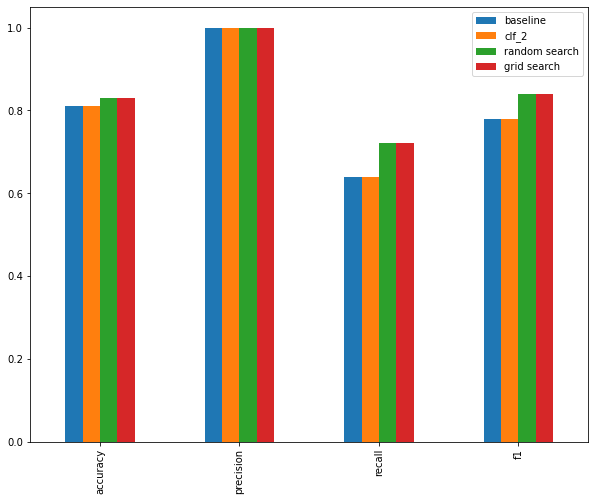

In [59]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "random search": rs_metrics,
                               "grid search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

### **Gradient Boosting Model**

### Splitting the dataset

In [60]:
from sklearn.model_selection import train_test_split
import seaborn as sns
np.random.seed(42)
X = df.drop("Group", axis=1)
y = df["Group"]
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=27)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((106, 10), (36, 10), (106,), (36,))

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.8611111111111112

**Make predictions using a machine learning model.**

  2 ways to make predictions:

1.   `predict()`
2.   `predict_proba()`


In [62]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [63]:
clf.predict_proba(X_test)[:5]

array([[0.00391441, 0.99608559],
       [0.01707084, 0.98292916],
       [0.99230897, 0.00769103],
       [0.9965845 , 0.0034155 ],
       [0.95828114, 0.04171886]])

**Evaluating the machine learning model.**


**Accuracy Score**

Using Estimator's built-in `score()`

In [64]:
print(f"Accuracy using buit-in score() is : {clf.score(X_test,y_test)*100:.2f}%")

Accuracy using buit-in score() is : 86.11%


Using the **cross-validation method**

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(clf, X, y, cv = 5, scoring = None)
print(f"Accuracy using cross-validation is : {np.mean(cross_val_score)* 100:.2f}%")

Accuracy using cross-validation is : 85.20%


*Thus cross-validation score is recommended here*

**ROC/AUC curve**

In [66]:
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.00391441, 0.99608559],
       [0.01707084, 0.98292916],
       [0.99230897, 0.00769103],
       [0.9965845 , 0.0034155 ],
       [0.95828114, 0.04171886],
       [0.00291127, 0.99708873],
       [0.98829849, 0.01170151],
       [0.98727651, 0.01272349],
       [0.00290837, 0.99709163],
       [0.9750495 , 0.0249505 ]])

In [67]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.99608559, 0.98292916, 0.00769103, 0.0034155 , 0.04171886,
       0.99708873, 0.01170151, 0.01272349, 0.99709163, 0.0249505 ])

In [68]:
# Clacuate fpr, tpr, threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [69]:
# Createa function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    '''
    
    # plot roc curve
    plt.plot(fpr, tpr, color ="orange", label="ROC")
    #plot line with no preedictive power.
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positve rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()


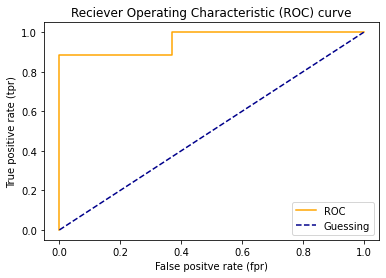

In [70]:
plot_roc_curve(fpr, tpr) 

In [71]:
from sklearn.metrics import roc_auc_score
area_under_curve_score = roc_auc_score(y_test, y_probs_positive)
print(f"Area under the curve score is : {area_under_curve_score * 100:.2f}%")

Area under the curve score is : 95.67%


**Confusion Matrix**

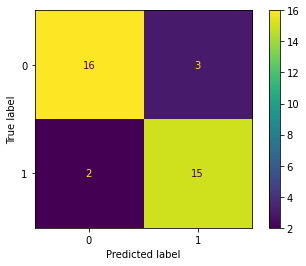

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_preds = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_true = y_test,y_pred = y_preds)

***Classification Report***

In [73]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test, y_preds,  output_dict = True))

,0,1,accuracy,macro avg,weighted avg
precision,0.888889,0.833333,0.861111,0.861111,0.862654
recall,0.842105,0.882353,0.861111,0.862229,0.861111
f1-score,0.864865,0.857143,0.861111,0.861004,0.861218
support,19.000000,17.000000,0.861111,36.000000,36.000000


**Using `cross-validation` method for calculationg Accuracy, precision and recall**

In [74]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.89655172, 0.79310345, 0.92857143, 0.75      , 0.85714286])

In [75]:
print(f"The Cross-Validates Accuracy: {np.mean(cv_acc)*100:.2f}%")

The Cross-Validates Accuracy: 84.51%


In [76]:
# Precision
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = "precision")
cv_precision

array([1.        , 0.75      , 1.        , 0.76923077, 0.85714286])

In [77]:
print(f"The Cross-Validated precision: {np.mean(cv_precision)}")

The Cross-Validated precision: 0.8752747252747252


In [78]:
# Recall

np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
cv_recall


array([0.78571429, 0.85714286, 0.85714286, 0.71428571, 0.85714286])

In [79]:
print(f"The Cross-Validated recall: {np.mean(cv_recall)}")

The Cross-Validated recall: 0.8142857142857143


In [157]:
# F!-score

np.random.seed(42)

cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = "f1")
cv_f1

array([0.88      , 0.82758621, 0.92307692, 0.83333333, 0.92307692])

In [158]:
print(f"The Cross-Validated recall: {np.mean(cv_f1)}")

The Cross-Validated recall: 0.8774146772767463


**Classification Report of Non-Cross-validation method**

In [80]:
# USing train_test_split.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Classifier metrics on the test set ")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1-score: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set 
Accuracy: 86.11%
Precision: 0.8333333333333334
Recall: 0.8823529411764706
F1-score: 0.8571428571428571


***Again the cross-validation gives greater values on the classification metrics***

In [81]:
#Using the previously calculated metric variables
print("Classifier metrics on the test set ")
print(f"The Cross-Validates Accuracy: {np.mean(cv_acc)*100:.2f}%")
print(f"The Cross-Validated precision: {np.mean(cv_precision)}")
print(f"The Cross-Validated recall: {np.mean(cv_recall)}")

Classifier metrics on the test set 
The Cross-Validates Accuracy: 84.51%
The Cross-Validated precision: 0.8752747252747252
The Cross-Validated recall: 0.8142857142857143


   **ADABOOST MODEL**  

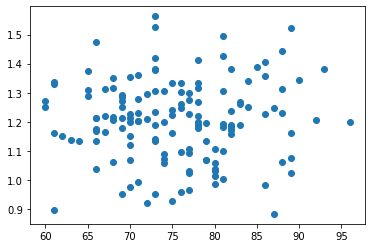

In [82]:
plt.scatter(df['Age'],df['ASF'])

(50.0, 100.0)

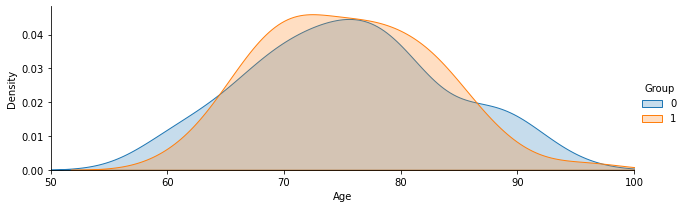

In [83]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

SPLITTING OF DATASET INTO TRAINING AND TESTING VARIABLES

In [84]:
from sklearn.model_selection import train_test_split
X = df.drop("Group", axis=1)
y = df["Group"]

#df.replace({-np.inf: -1_000_000, np.inf: 1_000_000}, inplace=True)
 

In [85]:
X



,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
5,0,0,93,14,2.0,30.0,0.0,1272,0.698,1.380
6,0,1,68,12,2.0,27.0,0.5,1457,0.806,1.205
...,...,...,...,...,...,...,...,...,...,...
143,0,1,79,20,1.0,26.0,0.5,1548,0.711,1.134
146,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174
147,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
148,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [86]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((106, 10), (36, 10), (106,), (36,))

FITTING OF ADABOOST CLASSIFIER

In [87]:
from sklearn.ensemble import AdaBoostClassifier

In [88]:
clf= AdaBoostClassifier(random_state=96)

In [89]:
clf.fit(X_train,y_train)

AdaBoostClassifier(random_state=96)

In [90]:
clf.score(X_train,y_train)

1.0

In [91]:
print(f"Accuracy using built-in method is :{clf.score(X_test,y_test)*100:.3f}%")

Accuracy using built-in method is :86.111%


In [92]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(clf, X, y, cv = 5, scoring = None)

In [93]:
print(f"Accuracy using cross-validation is : {np.mean(cross_val_score)* 100:.3f}%")

Accuracy using cross-validation is : 83.153%


ROC AND AUC CURVE

In [94]:
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.67272083, 0.32727917],
       [0.59606519, 0.40393481],
       [0.45755347, 0.54244653],
       [0.41599428, 0.58400572],
       [0.59367448, 0.40632552],
       [0.65307729, 0.34692271],
       [0.32015289, 0.67984711],
       [0.36479298, 0.63520702],
       [0.48845611, 0.51154389],
       [0.54134713, 0.45865287]])

In [95]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.32727917, 0.40393481, 0.54244653, 0.58400572, 0.40632552,
       0.34692271, 0.67984711, 0.63520702, 0.51154389, 0.45865287])

In [96]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

FUNCTION FOR PLOTTING ROC CURVE

In [97]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    '''
    
    # plot roc curve
    plt.plot(fpr, tpr, color ="orange", label="ROC")
    #plot line with no preedictive power.
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positve rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

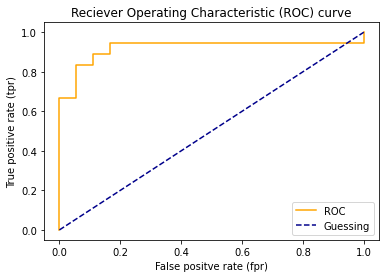

In [98]:
plot_roc_curve(fpr, tpr) 

In [99]:
from sklearn.metrics import roc_auc_score
area_under_curve_score = roc_auc_score(y_test, y_probs_positive)
print(f"Area under the curve score is : {area_under_curve_score * 100:.2f}%")

Area under the curve score is : 91.98%


PLOTTING OF CONFUSION MATRIX

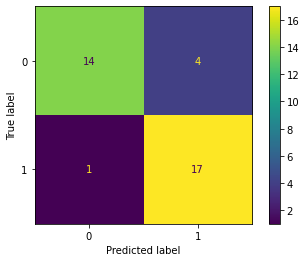

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_preds = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_true = y_test,y_pred = y_preds)

CLASSIFICATION REPORT

In [101]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test, y_preds,  output_dict = True))

,0,1,accuracy,macro avg,weighted avg
precision,0.933333,0.809524,0.861111,0.871429,0.871429
recall,0.777778,0.944444,0.861111,0.861111,0.861111
f1-score,0.848485,0.871795,0.861111,0.860140,0.860140
support,18.000000,18.000000,0.861111,36.000000,36.000000


USING CROSS-VALIDATION FOR CALCULATING ACCURACY,PRECISION AND RECALL

In [102]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.86206897, 0.72413793, 0.92857143, 0.82142857, 0.82142857])

In [103]:
print(f"The Cross-Validates Accuracy: {np.mean(cv_acc)*100:.2f}%")

The Cross-Validates Accuracy: 83.15%


In [104]:
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = "precision")
cv_precision

array([0.91666667, 0.66666667, 1.        , 0.90909091, 0.8       ])

In [105]:
print(f"The Cross-Validated precision: {np.mean(cv_precision)}")

The Cross-Validated precision: 0.8584848484848484


In [106]:
np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
cv_recall


array([0.78571429, 0.85714286, 0.85714286, 0.71428571, 0.85714286])

In [107]:
print(f"The Cross-Validated recall: {np.mean(cv_recall)}")

The Cross-Validated recall: 0.8142857142857143


In [164]:
np.random.seed(42)

cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = "f1")
cv_f1


array([0.88      , 0.82758621, 0.92307692, 0.83333333, 0.92307692])

In [165]:
print(f"The Cross-Validated F!-score: {np.mean(cv_f1)}")

The Cross-Validated F!-score: 0.8774146772767463


CLASSIFICATION REPORT 

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Classifier metrics on the test set ")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1-score: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set 
Accuracy: 86.11%
Precision: 0.8095238095238095
Recall: 0.9444444444444444
F1-score: 0.8717948717948718


CROSS VALIDATION METHOD FOR BETTER VALUES IN CLASSIFICATION METRICS

In [109]:
print("Classifier metrics on the test set ")
print(f"The Cross-Validates Accuracy: {np.mean(cv_acc)*100:.2f}%")
print(f"The Cross-Validated precision: {np.mean(cv_precision)}")
print(f"The Cross-Validated recall: {np.mean(cv_recall)}")

Classifier metrics on the test set 
The Cross-Validates Accuracy: 83.15%
The Cross-Validated precision: 0.8584848484848484
The Cross-Validated recall: 0.8142857142857143


### ExtraTrees-Classifier

### Spliting the dataset into train and test split

In [110]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Split data into X and y

X = df.drop("Group", axis=1)
y = df["Group"]

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((113, 10), (29, 10), (113,), (29,))

**FITTING THE MODEL**

In [111]:
from sklearn.ensemble import ExtraTreesClassifier
clf =  ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

## Classification model evaluation metrics

1. Accuracy.
2. Area under ROC curve.
3. Confusion matrix.
4. Classification report

**Accuracy**

In [112]:
print(f"Accuracy using buit-in score() is : {clf.score(X_test,y_test)*100:.2f}%")

Accuracy using buit-in score() is : 82.76%


**The scoring parameter - Cross_validated accuracy**

In [113]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(clf, X, y, cv = 5, scoring = None)
print(f"Accuracy using cross-validation is : {np.mean(cross_val_score)* 100:.2f}%")

Accuracy using cross-validation is : 88.77%


**ROC/AUC curve - Area under the reciever operating characteristic curve**

In [114]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)
# MAke predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.21, 0.79],
       [0.82, 0.18],
       [0.9 , 0.1 ],
       [0.49, 0.51],
       [0.03, 0.97],
       [0.56, 0.44],
       [0.74, 0.26],
       [0.68, 0.32],
       [0.93, 0.07],
       [0.02, 0.98]])

In [115]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.79, 0.18, 0.1 , 0.51, 0.97, 0.44, 0.26, 0.32, 0.07, 0.98])

In [116]:
# Clacuate fpr, tpr, threshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

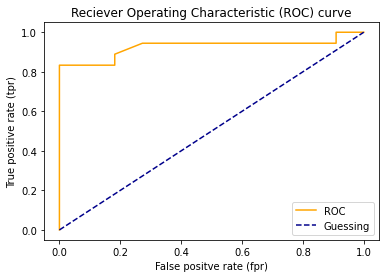

In [117]:
plot_roc_curve(fpr, tpr)

In [118]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9267676767676768

**Confusion Matrix**

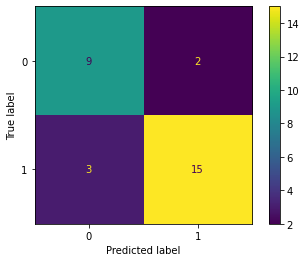

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay
y_preds = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                       y_pred = y_preds)

**Classification Report**

In [120]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test, y_preds,  output_dict = True))

,0,1,accuracy,macro avg,weighted avg
precision,0.750000,0.882353,0.827586,0.816176,0.832150
recall,0.818182,0.833333,0.827586,0.825758,0.827586
f1-score,0.782609,0.857143,0.827586,0.819876,0.828871
support,11.000000,18.000000,0.827586,29.000000,29.000000


**Cross-validated - precision, recall and f1-score**

In [121]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)

# Cross-validation accuracy.
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = None)
cv_acc

array([0.89655172, 0.82758621, 0.92857143, 0.85714286, 0.92857143])

In [122]:
# Cross-validated accuracy
print(f"The Cross-Validates Accuracy: {np.mean(cv_acc)*100:.2f}%")

The Cross-Validates Accuracy: 88.77%


In [123]:
# Precision
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = "precision")
cv_precision

array([1. , 0.8, 1. , 1. , 1. ])

In [124]:
print(f"The Cross-Validated precision: {np.mean(cv_precision)}")

The Cross-Validated precision: 0.96


In [125]:
# Recall

np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
cv_recall

array([0.78571429, 0.85714286, 0.85714286, 0.71428571, 0.85714286])

In [126]:
print(f"The Cross-Validated recall: {np.mean(cv_recall)}")

The Cross-Validated recall: 0.8142857142857143


In [162]:
np.random.seed(42)

cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = "f1")
cv_f1

array([0.88      , 0.82758621, 0.92307692, 0.83333333, 0.92307692])

In [163]:
print(f"The Cross-Validated F1-score: {np.mean(cv_f1)}")

The Cross-Validated F1-score: 0.8774146772767463


In [127]:
# Using non-cross-validation approach.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Classifier metrics on the test set ")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1-score: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set 
Accuracy: 82.76%
Precision: 0.8823529411764706
Recall: 0.8333333333333334
F1-score: 0.8571428571428571


In [128]:
# Cross-validated

In [129]:
print("Classifier metrics on the test set ")
print(f"The Cross-Validates Accuracy: {np.mean(cv_acc)*100:.2f}%")
print(f"The Cross-Validated precision: {np.mean(cv_precision)}")
print(f"The Cross-Validated recall: {np.mean(cv_recall)}")

Classifier metrics on the test set 
The Cross-Validates Accuracy: 88.77%
The Cross-Validated precision: 0.96
The Cross-Validated recall: 0.8142857142857143


# Voting Classifier

### Spliting dataset into training and testing

In [130]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Split data into X and y

X = df.drop("Group", axis=1)
y = df["Group"]

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((113, 10), (29, 10), (113,), (29,))

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1 = clf1.fit(X, y)
clf2 = clf2.fit(X, y)
clf3 = clf3.fit(X, y)
eclf = eclf.fit(X, y)

In [132]:
print(f"Accuracy using built-in method is :{eclf.score(X_test,y_test)*100:.3f}%")

Accuracy using built-in method is :96.552%


### Cross validation

In [133]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(eclf, X, y, cv = 5, scoring = None)

In [134]:
print(f"Accuracy using cross-validation is : {np.mean(cross_val_score)* 100:.3f}%")

Accuracy using cross-validation is : 86.576%


In [135]:
y_probs = eclf.predict_proba(X_test)
y_probs[:10]

array([[0.30370571, 0.69629429],
       [0.7226292 , 0.2773708 ],
       [0.57833094, 0.42166906],
       [0.61048105, 0.38951895],
       [0.2469375 , 0.7530625 ],
       [0.4936384 , 0.5063616 ],
       [0.69403772, 0.30596228],
       [0.69407153, 0.30592847],
       [0.59548835, 0.40451165],
       [0.24695697, 0.75304303]])

In [136]:
eclf.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [137]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.69629429, 0.2773708 , 0.42166906, 0.38951895, 0.7530625 ,
       0.5063616 , 0.30596228, 0.30592847, 0.40451165, 0.75304303])

In [138]:
# Clacuate fpr, tpr, threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [139]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    '''
    
    # plot roc curve
    plt.plot(fpr, tpr, color ="orange", label="ROC")
    #plot line with no preedictive power.
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positve rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

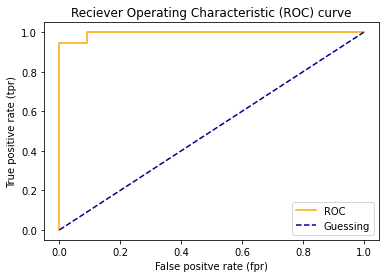

In [140]:
plot_roc_curve(fpr, tpr) 

In [141]:
from sklearn.metrics import roc_auc_score
area_under_curve_score = roc_auc_score(y_test, y_probs_positive)
print(f"Area under the curve score is : {area_under_curve_score * 100:.2f}%")

Area under the curve score is : 99.49%


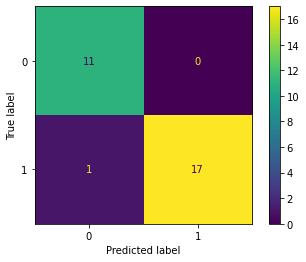

In [142]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_preds = eclf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_true = y_test,y_pred = y_preds)


In [143]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test, y_preds,  output_dict = True))

,0,1,accuracy,macro avg,weighted avg
precision,0.916667,1.000000,0.965517,0.958333,0.968391
recall,1.000000,0.944444,0.965517,0.972222,0.965517
f1-score,0.956522,0.971429,0.965517,0.963975,0.965774
support,11.000000,18.000000,0.965517,29.000000,29.000000


In [144]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)

cv_acc = cross_val_score(eclf, X, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.93103448, 0.86206897, 0.85714286, 0.75      , 0.89285714])

In [145]:
print(f"The Cross-Validates Accuracy: {np.mean(cv_acc)*100:.2f}%")

The Cross-Validates Accuracy: 85.86%


In [146]:
# Precision
np.random.seed(42)

cv_precision = cross_val_score(eclf, X, y, cv = 5, scoring = "precision")
cv_precision

array([1.        , 0.85714286, 0.85714286, 0.76923077, 0.92307692])

In [147]:
print(f"The Cross-Validated precision: {np.mean(cv_precision)}")

The Cross-Validated precision: 0.8813186813186814


In [148]:
# Recall

np.random.seed(42)

cv_recall = cross_val_score(eclf, X, y, cv = 5, scoring = "recall")
cv_recall

array([0.85714286, 0.85714286, 0.85714286, 0.71428571, 0.85714286])

In [149]:
print(f"The Cross-Validated recall: {np.mean(cv_recall)}")

The Cross-Validated recall: 0.8285714285714285


In [159]:
np.random.seed(42)

cv_f1 = cross_val_score(eclf, X, y, cv = 5, scoring = "f1")
cv_f1

array([0.92307692, 0.85714286, 0.85714286, 0.74074074, 0.88888889])

In [160]:
print(f"The Cross-Validated F1-score: {np.mean(cv_f1)}")

The Cross-Validated recall: 0.8533984533984535


In [150]:
# USing train_test_split.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Classifier metrics on the test set ")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1-score: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set 
Accuracy: 96.55%
Precision: 1.0
Recall: 0.9444444444444444
F1-score: 0.9714285714285714


In [151]:
#Using the previously calculated metric variables
print("Classifier metrics on the test set ")
print(f"The Cross-Validates Accuracy: {np.mean(cv_acc)*100:.2f}%")
print(f"The Cross-Validated precision: {np.mean(cv_precision)}")
print(f"The Cross-Validated recall: {np.mean(cv_recall)}")

Classifier metrics on the test set 
The Cross-Validates Accuracy: 85.86%
The Cross-Validated precision: 0.8813186813186814
The Cross-Validated recall: 0.8285714285714285
